# kaggle및 구글드라이브에서 데이터셋 불러오기

In [1]:
# data 불러오기
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdulwadood11220/netflix-customer-churn-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/netflix-customer-churn-dataset


In [2]:
path += "/netflix_customer_churn.csv"

In [3]:
# csv 파일 읽기
import pandas as pd
df = pd.read_csv(path)
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


# 머신러닝 분석에 필요없는 컬럼제거
- customer_id

In [4]:
# 필요없는 컬럼제거: customer_id
df = df.drop(columns=['customer_id'], axis=1)
df

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,Credit Card,4,4.10,Drama
4996,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,PayPal,3,3.08,Documentary
4997,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,Debit Card,2,0.33,Action
4998,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,Credit Card,4,2.28,Sci-Fi


# 머신러닝을 위한 target과 feature 나누기
- 고객 이탈(churned)을 예측하기 위함
- target: churned, features: 나머지 12개 columns

In [5]:
# target과 나머지 features로 분류
target = df['churned']
features = df.drop(columns=['churned'], axis=1)
features.shape

(5000, 12)

In [6]:
target.shape

(5000,)

# target의 0과 1개수 파악하기

In [7]:
# target 데이터의 0과 1의 개수 파악
target.value_counts()

,count
churned,
1,2515
0,2485


- churned데이터의 개수가 2500개와 큰 차이가 없음
- 별도의 데이터 축소 작업은 하지 않음

# train_test_split 진행
- 앞으로의 random_state는 42로 설정
- 성능에 따라 test_size는 조정가능

In [8]:
# target과 features에 대해서 train_test_split 진행
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 12), (1000, 12), (4000,), (1000,))

# train과 test데이터에 대한 결측치 확인

In [9]:
# X_train 정보확인
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 4227 to 860
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4000 non-null   int64  
 1   gender                  4000 non-null   object 
 2   subscription_type       4000 non-null   object 
 3   watch_hours             4000 non-null   float64
 4   last_login_days         4000 non-null   int64  
 5   region                  4000 non-null   object 
 6   device                  4000 non-null   object 
 7   monthly_fee             4000 non-null   float64
 8   payment_method          4000 non-null   object 
 9   number_of_profiles      4000 non-null   int64  
 10  avg_watch_time_per_day  4000 non-null   float64
 11  favorite_genre          4000 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 406.2+ KB


In [10]:
# X_test 정보확인
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1501 to 1926
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1000 non-null   int64  
 1   gender                  1000 non-null   object 
 2   subscription_type       1000 non-null   object 
 3   watch_hours             1000 non-null   float64
 4   last_login_days         1000 non-null   int64  
 5   region                  1000 non-null   object 
 6   device                  1000 non-null   object 
 7   monthly_fee             1000 non-null   float64
 8   payment_method          1000 non-null   object 
 9   number_of_profiles      1000 non-null   int64  
 10  avg_watch_time_per_day  1000 non-null   float64
 11  favorite_genre          1000 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 101.6+ KB


# train, test 데이터셋 분석 결과
- train, test 모두 결측치(null)없음
- 수치형 데이터: age, watch_hours, last_login_days, monthly_fee, number_of_profiles, avg_watch_time_per_day
- 문자형(카테고리) 데이터: gender, subscription_type, region, device, payment_method, favorite_genre

# 각 column별 이탈(churned)과의 상관관계 분석

## 수치형 데이터: age, watch_hours, last_login_days, monthly_fee, number_of_profiles, avg_watch_time_per_day

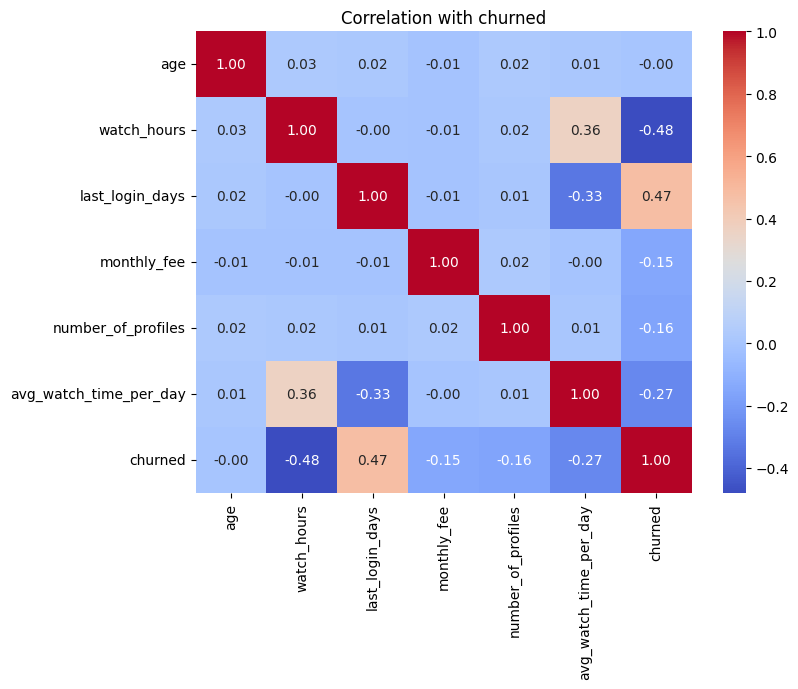

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
train_data = pd.concat([X_train, y_train], axis=1)
# 수치형 데이터에 대한 heatmap 상관관계 분석
numeric_cols = train_data.select_dtypes(include=['float64', 'int64'])

# 상관관계 계산
corr = numeric_cols.corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with churned')
plt.show()

# 상관관계 분석결과
- age는 상관관계가 거의 없으므로 featuring 대상에서 제외
- watch_hours와 last_login_days의 상관관계가 높음
- watch_hours와 last_login_days를 중심으로 age을 제외한 feature에 대해서 featuring 진행

# 문자열(카테고리) 분석
- 문자형(카테고리) 데이터: gender, subscription_type, region, device, payment_method, favorite_genre

## gender

In [12]:
# gender
train_data['gender'].value_counts()

,count
gender,
Female,1373
Other,1316
Male,1311


In [13]:
# gender와 churned간에 상관관계
train_data.groupby('gender')['churned'].value_counts(sort=False)

gender  churned
Female  0          669
        1          704
Male    0          660
        1          651
Other   0          658
        1          658
Name: count, dtype: int64

In [14]:
# 비율
train_data.groupby('gender')['churned'].value_counts(normalize=True, sort=False)

gender  churned
Female  0          0.487254
        1          0.512746
Male    0          0.503432
        1          0.496568
Other   0          0.500000
        1          0.500000
Name: proportion, dtype: float64

<Axes: xlabel='gender,churned'>

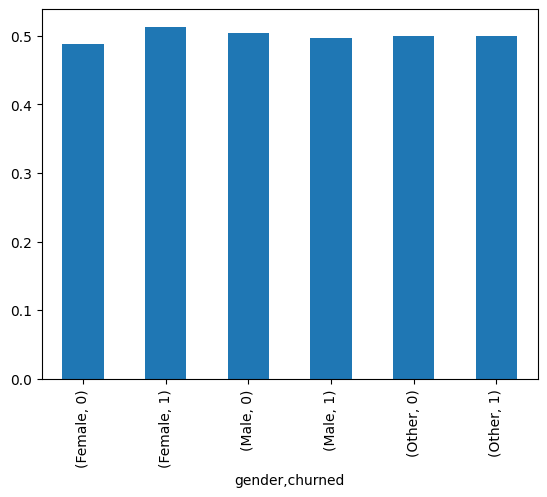

In [15]:
# 비율에 대한 barplot
train_data.groupby('gender')['churned'].value_counts(normalize=True, sort=False).plot(kind='bar')

- Male과 Other는 사실상 churned 차이가 없음
- Female도 유의미한 차이 없음
- gender에 대해서는 featuring 안하는 것이 바람직하다고 판단됨
- 굳이 featuring하자면 Female 여부로 나누는 것이 최선임

## subscription_type

In [16]:
# subscription_type
train_data['subscription_type'].value_counts()

,count
subscription_type,
Premium,1359
Basic,1346
Standard,1295


In [17]:
# churned 간의 상관관계
train_data.groupby('subscription_type')['churned'].value_counts(sort=False)

subscription_type  churned
Basic              0          519
                   1          827
Premium            0          762
                   1          597
Standard           0          706
                   1          589
Name: count, dtype: int64

In [18]:
# 비율
train_data.groupby('subscription_type')['churned'].value_counts(normalize=True, sort=False)

subscription_type  churned
Basic              0          0.385587
                   1          0.614413
Premium            0          0.560706
                   1          0.439294
Standard           0          0.545174
                   1          0.454826
Name: proportion, dtype: float64

<Axes: xlabel='subscription_type,churned'>

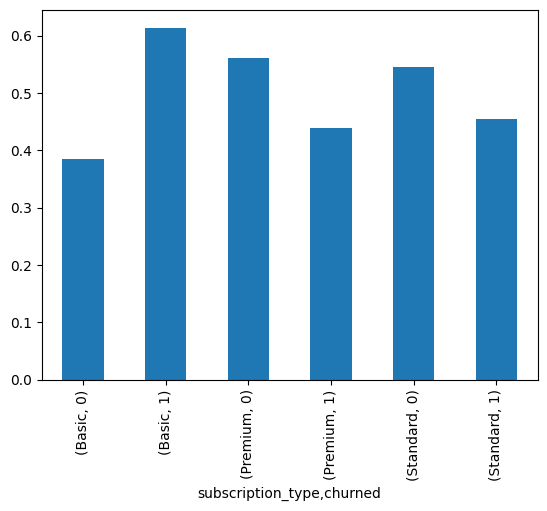

In [19]:
# barplot
train_data.groupby('subscription_type')['churned'].value_counts(normalize=True, sort=False).plot(kind='bar')

- Basic일수록 이탈확률(churned:1)이 큼
- Basic이 아니면, 이탈하지 않을 가능성이 높음
- Basic여부에 대한 featuring이 권장됨

## region

In [20]:
# region
train_data['region'].value_counts()

,count
region,
South America,711
North America,691
Europe,682
Asia,670
Africa,636
Oceania,610


In [21]:
# churned 간의 상관관계
train_data.groupby('region')['churned'].value_counts(sort=False)

region         churned
Africa         0          336
               1          300
Asia           0          335
               1          335
Europe         0          332
               1          350
North America  0          335
               1          356
Oceania        0          298
               1          312
South America  0          351
               1          360
Name: count, dtype: int64

In [22]:
# 비율
train_data.groupby('region')['churned'].value_counts(normalize=True, sort=False)

region         churned
Africa         0          0.528302
               1          0.471698
Asia           0          0.500000
               1          0.500000
Europe         0          0.486804
               1          0.513196
North America  0          0.484805
               1          0.515195
Oceania        0          0.488525
               1          0.511475
South America  0          0.493671
               1          0.506329
Name: proportion, dtype: float64

<Axes: xlabel='region,churned'>

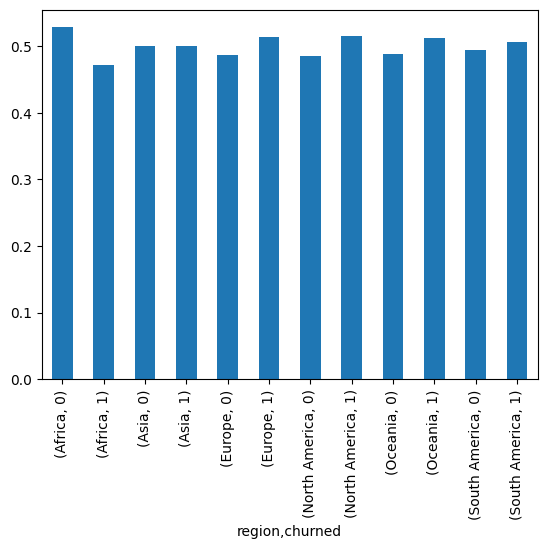

In [23]:
# bar plot
train_data.groupby('region')['churned'].value_counts(normalize=True, sort=False).plot(kind='bar')

- Africa의 이탈률이 상대적으로 적음
- 이외 지역에서는 비슷하거나, 이탈률이 약간 많음
- 모든 카테고리에 대한 상관관계가 낮음
- 굳이 featuring을 한다면 Africa의 여부에 대한 featuring 진행

## device

In [24]:
# device
train_data['device'].value_counts()

,count
device,
Tablet,836
Mobile,823
Laptop,798
TV,787
Desktop,756


In [25]:
# churned 간의 상관관계
train_data.groupby('device')['churned'].value_counts(sort=False)

device   churned
Desktop  0          386
         1          370
Laptop   0          378
         1          420
Mobile   0          414
         1          409
TV       0          400
         1          387
Tablet   0          409
         1          427
Name: count, dtype: int64

In [26]:
# 비율
train_data.groupby('device')['churned'].value_counts(normalize=True, sort=False)

device   churned
Desktop  0          0.510582
         1          0.489418
Laptop   0          0.473684
         1          0.526316
Mobile   0          0.503038
         1          0.496962
TV       0          0.508259
         1          0.491741
Tablet   0          0.489234
         1          0.510766
Name: proportion, dtype: float64

<Axes: xlabel='device,churned'>

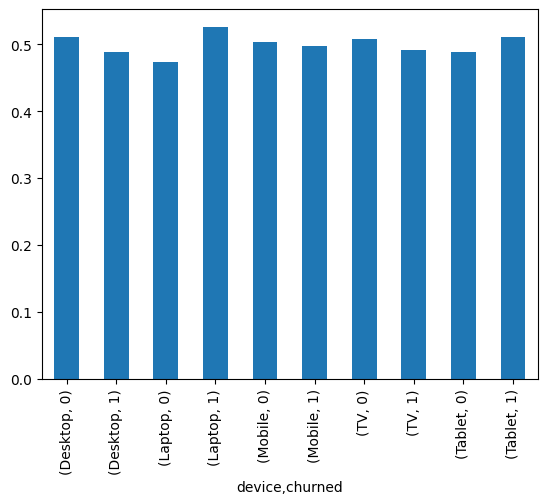

In [27]:
# barplot
train_data.groupby('device')['churned'].value_counts(normalize=True, sort=False).plot(kind='bar')

- 모든 value에 대한 상관관계가 낮거나 없음
- 5가지의 value를 모두 반영해서 encoding하는 방식으로 활용가능

##  payment_method

In [28]:
# payment_method
train_data['payment_method'].value_counts()

,count
payment_method,
Debit Card,839
PayPal,812
Gift Card,801
Credit Card,783
Crypto,765


In [29]:
# churned 간의 상관관계
train_data.groupby('payment_method')['churned'].value_counts(sort=False)

payment_method  churned
Credit Card     0          438
                1          345
Crypto          0          311
                1          454
Debit Card      0          460
                1          379
Gift Card       0          335
                1          466
PayPal          0          443
                1          369
Name: count, dtype: int64

In [30]:
# 비율
train_data.groupby('payment_method')['churned'].value_counts(normalize=True, sort=False)

payment_method  churned
Credit Card     0          0.559387
                1          0.440613
Crypto          0          0.406536
                1          0.593464
Debit Card      0          0.548272
                1          0.451728
Gift Card       0          0.418227
                1          0.581773
PayPal          0          0.545567
                1          0.454433
Name: proportion, dtype: float64

<Axes: xlabel='payment_method,churned'>

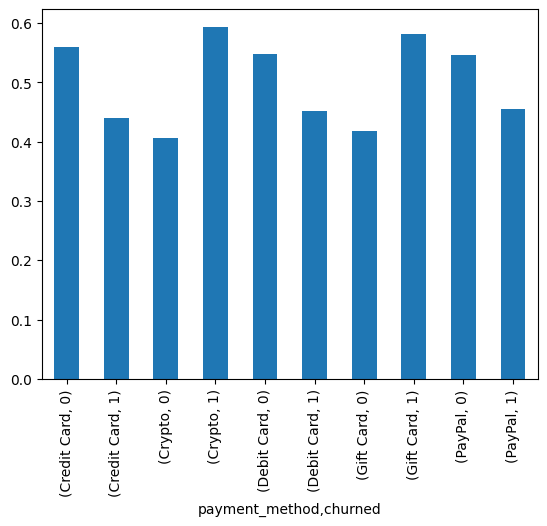

In [31]:
# bar plot
train_data.groupby('payment_method')['churned'].value_counts(normalize=True, sort=False).plot(kind='bar')

- 이탈(churned) 유력: Crypto, Gift Card
- 잔류(not churned) 유력: Credit Card, Debit Card, Paypal

## favorite_genre

In [32]:
# favorite_genre
train_data['favorite_genre'].value_counts()

,count
favorite_genre,
Romance,592
Sci-Fi,582
Drama,581
Documentary,574
Horror,573
Action,551
Comedy,547


In [33]:
# chruned
train_data.groupby('favorite_genre')['churned'].value_counts(sort=False)

favorite_genre  churned
Action          0          266
                1          285
Comedy          0          279
                1          268
Documentary     0          282
                1          292
Drama           0          274
                1          307
Horror          0          282
                1          291
Romance         0          303
                1          289
Sci-Fi          0          301
                1          281
Name: count, dtype: int64

In [34]:
# 비율
train_data.groupby('favorite_genre')['churned'].value_counts(normalize=True, sort=False)

favorite_genre  churned
Action          0          0.482759
                1          0.517241
Comedy          0          0.510055
                1          0.489945
Documentary     0          0.491289
                1          0.508711
Drama           0          0.471601
                1          0.528399
Horror          0          0.492147
                1          0.507853
Romance         0          0.511824
                1          0.488176
Sci-Fi          0          0.517182
                1          0.482818
Name: proportion, dtype: float64

<Axes: xlabel='favorite_genre,churned'>

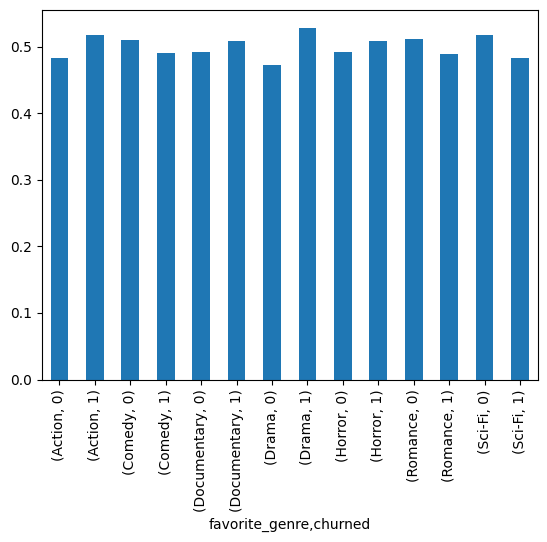

In [35]:
# bar plot
train_data.groupby('favorite_genre')['churned'].value_counts(normalize=True, sort=False).plot(kind='bar')

- 이탈 확률이 높음: Drama, Action
- 이탈 확률이 낮음: Sci-Fi, Romance, Comedy
- 상관관계 없음: Documentary, Horror
- 각 value를 위의 3가지 category로 나눠서 featuring 고려 가능